### Notebook to create a heatmap for visualization of `expimap` analysis results

- **Developed by:** Anna Maguza
- **Affilation:** Faculty of Medicine, Würzburg University
- **Created date:** 10th October 2024
- **Last modified date:** 10th October 2024

This notebook intends to create a heatmap from the `expimap` analysis fetal stem cells vs LGR5+/- stem cells.

+ Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap

In [2]:
data_path = 'data/expimap_results'

In [3]:
file_names = [
    'LGR5high_vs_FXYD3+_CKB+_SC.csv',
    'LGR5high_vs_MTRNR2L12+ASS1+_SC.csv',
    'LGR5high_vs_RPS10+_RPS17+_SC.csv',
    'LGR5low_vs_FXYD3+_CKB+_SC.csv',
    'LGR5low_vs_MTRNR2L12+ASS1+_SC.csv',
    'LGR5low_vs_RPS10+_RPS17+_SC.csv'
]

In [4]:
def load_and_process_file(file_path):
    df = pd.read_csv(file_path)
    df['Comparison'] = os.path.splitext(os.path.basename(file_path))[0]
    return df

In [5]:
dataframes = [load_and_process_file(os.path.join(data_path, file_name)) for file_name in file_names]
combined_df = pd.concat(dataframes, ignore_index=True)

In [6]:
pivot_df = combined_df.pivot(index='Gene Program', columns='Comparison', values='Absolute Log Bayes Factor')

In [7]:
# Keep only gene programs that are present in all dataframes
pivot_df = pivot_df.dropna()

In [8]:
pivot_df = pivot_df.sort_index(axis=1)

In [9]:
pivot_df['max_bayes'] = pivot_df.max(axis=1)
pivot_df = pivot_df.sort_values('max_bayes', ascending=False)
pivot_df = pivot_df.drop('max_bayes', axis=1)

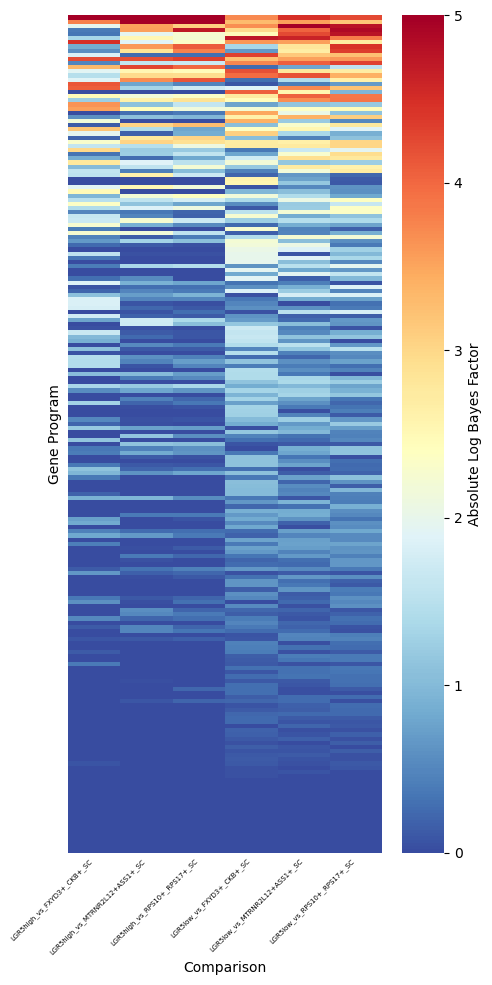

In [14]:
plt.figure(figsize=(5, 10))
sns.heatmap(pivot_df, cmap='RdYlBu_r', center=2.4, vmin=0, vmax=5,
            xticklabels=True, yticklabels=False,
            cbar_kws={'label': 'Absolute Log Bayes Factor'}) 

plt.xticks(rotation=45, ha='right', fontsize=5)
plt.yticks(fontsize=2)
plt.tight_layout()
plt.tick_params(axis='both', which='both', length=0)
plt.savefig('data/expimap_results/lgr5_comparison_heatmap_no_y_labels.png', dpi=300, bbox_inches='tight')
plt.show()

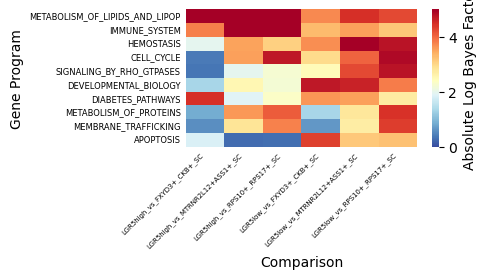

In [22]:
# leave top 10 gene programs
top_10 = pivot_df.head(10)

plt.figure(figsize=(5, 3))
sns.heatmap(top_10, cmap='RdYlBu_r', center=2.4, vmin=0, vmax=5,
            xticklabels=True, yticklabels=True,
            cbar_kws={'label': 'Absolute Log Bayes Factor'}) 

plt.xticks(rotation=45, ha='right', fontsize=5)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.tick_params(axis='both', which='both', length=0)
plt.savefig('data/expimap_results/lgr5_comparison_heatmap_top10.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
pivot_df.to_csv('data/expimap_results/processed_lgr5_comparison_data.csv')